In [1]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
train=pd.read_csv("featured_train.csv")
test=pd.read_csv("featured_test.csv")

In [3]:
train.head()

,Unnamed: 0,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [4]:
test.head()

,Unnamed: 0,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,20.750,1,0.007565,13,107.8622,1999,1,0,1
1,1,8.300,4,0.038428,4,87.3198,2007,1,1,1
2,2,14.600,1,0.099575,11,241.7538,1998,1,2,0
3,3,7.315,1,0.015388,13,155.0340,2007,1,1,1
4,4,12.500,2,0.118599,4,234.2300,1985,1,2,3


In [5]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [7]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1999,1,0,1
1,8.300,4,0.038428,4,87.3198,2007,1,1,1
2,14.600,1,0.099575,11,241.7538,1998,1,2,0
3,7.315,1,0.015388,13,155.0340,2007,1,1,1
4,12.500,2,0.118599,4,234.2300,1985,1,2,3


In [8]:
Test=pd.read_csv("Test.csv")
Test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Model Building

In [9]:
# Spliting dataset
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
#import modules

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear Regression

In [12]:
li_model = linear_model.LinearRegression()
li_model.fit(X_train, y_train)
y_pred =li_model.predict(X_test)

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 856.0143000711381
Mean Squared Error: 1293260.8047103512
Root Mean Squared Error: 1137.2162523945703
r2_score: 0.5241813658675873


In [14]:
li_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
li_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,1094.335777
2957,356.8688,608.762114
7031,377.5086,1052.506105
1084,5778.4782,4236.368024
856,2356.9320,2765.338616
4304,865.5400,848.859873
2132,4613.9940,4583.336804
1385,2410.8618,2816.137599
5239,1948.1308,2114.877537
6516,1937.4780,3532.349626


<AxesSubplot: >

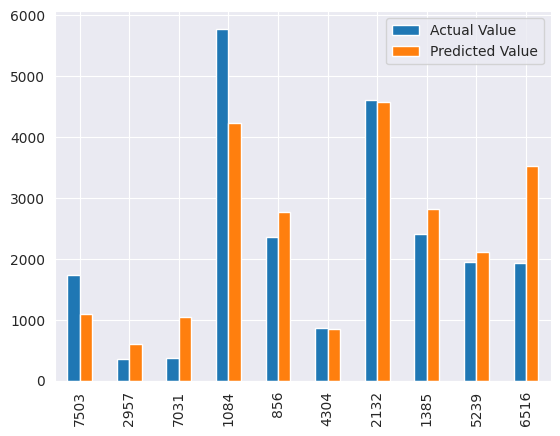

In [15]:
li_graph = li_result.head(10)
li_graph.plot(kind='bar')

# KNN

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=50)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [17]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 970.2250734099706
Mean Squared Error: 1716346.9649642336
Root Mean Squared Error: 1310.0942580456697
r2 score: 0.36851881260756136


In [18]:
knn_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
knn_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,1401.415788
2957,356.8688,645.479784
7031,377.5086,606.890016
1084,5778.4782,3732.168532
856,2356.9320,3143.108640
4304,865.5400,573.972864
2132,4613.9940,3565.505476
1385,2410.8618,2153.969528
5239,1948.1308,1644.233048
6516,1937.4780,2960.040272


<AxesSubplot: >

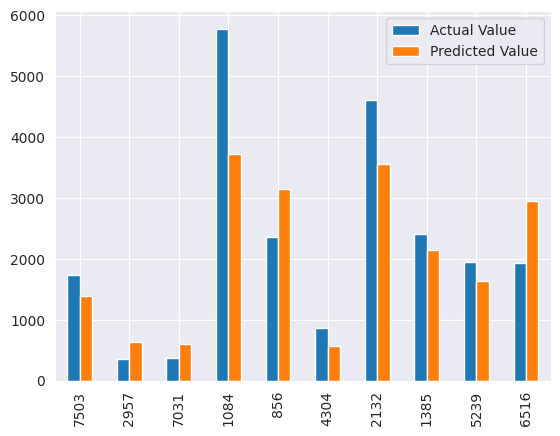

In [19]:
knn_graph = knn_result.head(10)
knn_graph.plot(kind='bar')

# Random Forest

In [20]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 0)
  
# fit the regressor with x and y data
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test)

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 760.77567491261
Mean Squared Error: 1194536.9391147296
Root Mean Squared Error: 1092.948735812769
r2_score: 0.5605040122455555


In [22]:
rf_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
rf_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,713.874089
2957,356.8688,879.901306
7031,377.5086,737.303591
1084,5778.4782,4506.234270
856,2356.9320,2353.330022
4304,865.5400,455.610269
2132,4613.9940,5501.462123
1385,2410.8618,1510.843347
5239,1948.1308,1364.457230
6516,1937.4780,3004.605595


<AxesSubplot: >

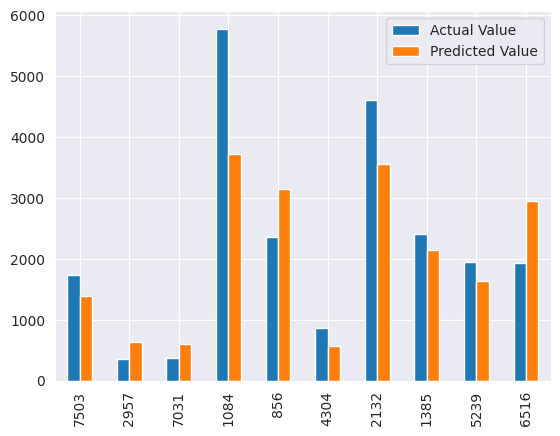

In [23]:
rf_graph = knn_result.head(10)
rf_graph.plot(kind='bar')

# Decision Tree

In [24]:
dt_model=DecisionTreeRegressor()  # We normalize our data for better results
dt_model.fit(X_train,y_train)

y_pred=dt_model.predict(X_test)

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 1031.2687492082111
Mean Squared Error: 2251367.674766579
Root Mean Squared Error: 1500.4558223308607
r2_score: 0.17167311648540728


In [26]:
dt_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
dt_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,554.6114
2957,356.8688,596.5568
7031,377.5086,209.7270
1084,5778.4782,5000.8238
856,2356.9320,2348.9424
4304,865.5400,432.7700
2132,4613.9940,4555.4036
1385,2410.8618,421.4514
5239,1948.1308,1012.0160
6516,1937.4780,4262.4516


<AxesSubplot: >

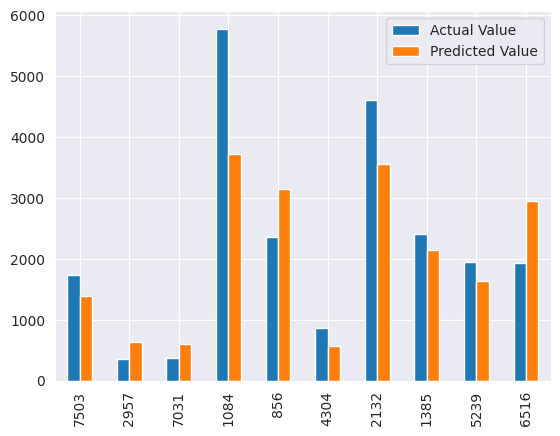

In [27]:
dt_graph = knn_result.head(10)
dt_graph.plot(kind='bar')

# Applying model in  test dataset

In [28]:
predictions = rf_model.predict(test)

In [29]:
# creating csv

output = pd.DataFrame({'Item_Identifier': Test['Item_Identifier'], 'Outlet_Identifier':Test['Outlet_Identifier'], 'Item_Outlet_Sales':predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# pickle File

In [30]:
import pickle
pickle.dump(rf_model, open('pickle.pkl','wb'))
model = pickle.load(open('pickle.pkl','rb'))